In [1]:
pip install pandas


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.3 MB 7.4 MB/s eta 0:00:01
     |████████████████████████████████| 5.3 MB 68.4 MB/s eta 0:00:01
     |████████████████████████████████| 347 kB 80.5 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 72.3 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd

df = pd.read_stata("karlan_list_2007.dta")

df.head()


,treatment,control,ratio,ratio2,ratio3,size,size25,size50,size100,sizeno,...,redcty,bluecty,pwhite,pblack,page18_39,ave_hh_sz,median_hhincome,powner,psch_atlstba,pop_propurban
0,0,1,Control,0,0,Control,0,0,0,0,...,0.0,1.0,0.446493,0.527769,0.317591,2.10,28517.0,0.499807,0.324528,1.0
1,0,1,Control,0,0,Control,0,0,0,0,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,1,0,0,"$100,000",0,0,1,0,...,0.0,1.0,0.935706,0.011948,0.276128,2.48,51175.0,0.721941,0.192668,1.0
3,1,0,1,0,0,Unstated,0,0,0,1,...,1.0,0.0,0.888331,0.010760,0.279412,2.65,79269.0,0.920431,0.412142,1.0
4,1,0,1,0,0,"$50,000",0,1,0,0,...,0.0,1.0,0.759014,0.127421,0.442389,1.85,40908.0,0.416072,0.439965,1.0


In [ ]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 30.3 MB 6.6 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 9.9 MB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 232 kB 86.4 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

def test_balance(variable: str):
    # Drop missing values
    treat = df[df['treatment'] == 1][variable].dropna()
    ctrl = df[df['treatment'] == 0][variable].dropna()

    X1, X2 = treat.mean(), ctrl.mean()
    s1, s2 = treat.std(), ctrl.std()
    n1, n2 = len(treat), len(ctrl)

    # Manual t-statistic using class slide formula
    t_stat_manual = (X1 - X2) / np.sqrt((s1**2)/n1 + (s2**2)/n2)

    reg = smf.ols(f'{variable} ~ treatment', data=df[['treatment', variable]].dropna()).fit()
    coef = reg.params['treatment']
    t_stat_reg = reg.tvalues['treatment']
    p_val = reg.pvalues['treatment']

    return {
        "variable": variable,
        "manual t-stat": round(t_stat_manual, 4),
        "regression coef": round(coef, 4),
        "regression t-stat": round(t_stat_reg, 4),
        "p-value": round(p_val, 4),
        "significant at 95%": p_val < 0.05
    }

all_vars_to_test = [
    'mrm2', 'years', 'female', 'couple',     # behavioral/demographic
    'hpa', 'ltmedmra', 'freq',               # prior donation history
    'pwhite', 'ave_hh_sz', 'median_hhincome', 'powner', 'psch_atlstba'  # ZIP-level demographics
]

results = [test_balance(var) for var in all_vars_to_test]

results_df = pd.DataFrame(results)
results_df


,variable,manual t-stat,regression coef,regression t-stat,p-value,significant at 95%
0,mrm2,0.1195,0.0137,0.1195,0.9049,False
1,years,-1.0909,-0.0575,-1.1030,0.2700,False
2,female,-1.7535,-0.0075,-1.7584,0.0787,False
3,couple,-0.5823,-0.0016,-0.5838,0.5594,False
4,hpa,0.9704,0.6371,0.9441,0.3451,False
5,ltmedmra,1.9099,0.0091,1.9097,0.0562,False
6,freq,-0.1108,-0.0120,-0.1109,0.9117,False
7,pwhite,-0.5590,-0.0009,-0.5603,0.5753,False
8,ave_hh_sz,0.8234,0.0030,0.8243,0.4098,False
9,median_hhincome,-0.7433,-157.9255,-0.7417,0.4583,False


In [15]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.8 MB 7.0 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 13.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 35.6 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 56.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 46.6 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 33.7 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


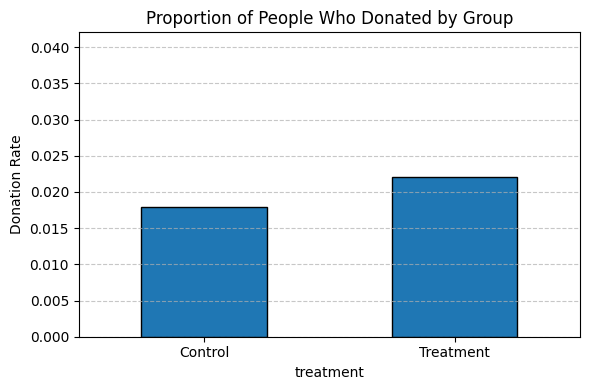

In [ ]:
import matplotlib.pyplot as plt

donation_rate = df.groupby("treatment")["gave"].mean().rename({0: "Control", 1: "Treatment"})

plt.figure(figsize=(6, 4))
donation_rate.plot(kind='bar', edgecolor='black')
plt.title("Proportion of People Who Donated by Group")
plt.ylabel("Donation Rate")
plt.xticks([0, 1], ['Control', 'Treatment'], rotation=0)
plt.ylim(0, donation_rate.max() + 0.02)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import ttest_ind

gave_treat = df[df['treatment'] == 1]['gave']
gave_ctrl = df[df['treatment'] == 0]['gave']

t_stat, p_val = ttest_ind(gave_treat, gave_ctrl, equal_var=False)

# Linear regression: gave ~ treatment
reg_gave = smf.ols('gave ~ treatment', data=df).fit()

{
    "t-test": {
        "t-statistic": round(t_stat, 4),
        "p-value": round(p_val, 4)
    },
    "regression": {
        "coef on treatment": round(reg_gave.params['treatment'], 4),
        "t-statistic": round(reg_gave.tvalues['treatment'], 4),
        "p-value": round(reg_gave.pvalues['treatment'], 4),
        "R-squared": round(reg_gave.rsquared, 4)
    }
}


{'t-test': {'t-statistic': np.float64(3.2095), 'p-value': np.float64(0.0013)},
 'regression': {'coef on treatment': np.float64(0.0042),
  't-statistic': np.float64(3.1014),
  'p-value': np.float64(0.0019),
  'R-squared': np.float64(0.0002)}}

In [18]:
import statsmodels.api as sm

# Run probit regression: gave ~ treatment
probit_model = sm.Probit(df['gave'], sm.add_constant(df['treatment']))
probit_result = probit_model.fit(disp=0)  # disp=0 suppresses output

# Extract and format results
summary_table = {
    "coef (treatment)": round(probit_result.params['treatment'], 4),
    "std error": round(probit_result.bse['treatment'], 4),
    "z-stat": round(probit_result.tvalues['treatment'], 4),
    "p-value": round(probit_result.pvalues['treatment'], 4),
    "pseudo R-squared": round(probit_result.prsquared, 4),
    "n obs": int(probit_result.nobs)
}
summary_table


{'coef (treatment)': np.float64(0.0868),
 'std error': np.float64(0.0279),
 'z-stat': np.float64(3.1129),
 'p-value': np.float64(0.0019),
 'pseudo R-squared': np.float64(0.001),
 'n obs': 50083}

In [ ]:
```{python}
import pandas as pd
from scipy.stats import ttest_ind

treat_df = df[df['treatment'] == 1]

gave_1to1 = treat_df[treat_df['ratio'] == 1]['gave']
gave_2to1 = treat_df[treat_df['ratio'] == 2]['gave']
gave_3to1 = treat_df[treat_df['ratio'] == 3]['gave']

ttest_2v1 = ttest_ind(gave_2to1, gave_1to1, equal_var=False)
ttest_3v1 = ttest_ind(gave_3to1, gave_1to1, equal_var=False)
ttest_3v2 = ttest_ind(gave_3to1, gave_2to1, equal_var=False)

t_test_results = pd.DataFrame({
    "Comparison": ["2:1 vs 1:1", "3:1 vs 1:1", "3:1 vs 2:1"],
    "t-statistic": [
        round(ttest_2v1.statistic, 4),
        round(ttest_3v1.statistic, 4),
        round(ttest_3v2.statistic, 4)
    ],
    "p-value": [
        round(ttest_2v1.pvalue, 4),
        round(ttest_3v1.pvalue, 4),
        round(ttest_3v2.pvalue, 4)
    ]
})

t_test_results
```

{'2:1 vs 1:1': {'t-stat': np.float16(nan), 'p-value': np.float16(nan)},
 '3:1 vs 1:1': {'t-stat': np.float16(nan), 'p-value': np.float16(nan)},
 '3:1 vs 2:1': {'t-stat': np.float16(nan), 'p-value': np.float16(nan)}}

In [ ]:
# Corrected groupings based on numeric match ratio values
gave_1to1 = treat_df[treat_df['ratio'] == 1]['gave']
gave_2to1 = treat_df[treat_df['ratio'] == 2]['gave']
gave_3to1 = treat_df[treat_df['ratio'] == 3]['gave']

ttest_2v1 = ttest_ind(gave_2to1, gave_1to1, equal_var=False)
ttest_3v1 = ttest_ind(gave_3to1, gave_1to1, equal_var=False)
ttest_3v2 = ttest_ind(gave_3to1, gave_2to1, equal_var=False)

{
    "2:1 vs 1:1": {"t-stat": round(ttest_2v1.statistic, 4), "p-value": round(ttest_2v1.pvalue, 4)},
    "3:1 vs 1:1": {"t-stat": round(ttest_3v1.statistic, 4), "p-value": round(ttest_3v1.pvalue, 4)},
    "3:1 vs 2:1": {"t-stat": round(ttest_3v2.statistic, 4), "p-value": round(ttest_3v2.pvalue, 4)}
}


{'2:1 vs 1:1': {'t-stat': np.float64(0.965), 'p-value': np.float64(0.3345)},
 '3:1 vs 1:1': {'t-stat': np.float64(1.015), 'p-value': np.float64(0.3101)},
 '3:1 vs 2:1': {'t-stat': np.float64(0.0501), 'p-value': np.float64(0.96)}}

In [24]:
import pandas as pd
import statsmodels.formula.api as smf

# Step 1: Subset the treatment group only
treatment_df = df[df['treatment'] == 1].copy()

# Step 2: Create dummy variables for each match ratio
# (1:1, 2:1, 3:1) — create ratio1 just to follow instruction, though it will be omitted in regression
treatment_df['ratio1'] = (treatment_df['ratio'] == 1).astype(int)
treatment_df['ratio2'] = (treatment_df['ratio'] == 2).astype(int)
treatment_df['ratio3'] = (treatment_df['ratio'] == 3).astype(int)

# Step 3: Run regression using ratio1 as the baseline
reg = smf.ols('gave ~ ratio2 + ratio3', data=treatment_df).fit()
print("=== Regression: gave ~ ratio2 + ratio3 (baseline is ratio1) ===")
print(reg.summary())

# Optional Step 4: Categorical regression (not recommended here due to multicollinearity issues)
# Works best if ratio is treated as a category and one level is dropped automatically
reg_cat = smf.ols('gave ~ C(ratio)', data=treatment_df).fit()
print("\n=== Categorical Regression: gave ~ C(ratio) ===")
print(reg_cat.summary())


=== Regression: gave ~ ratio2 + ratio3 (baseline is ratio1) ===
                            OLS Regression Results                            
Dep. Variable:                   gave   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6454
Date:                Fri, 18 Apr 2025   Prob (F-statistic):              0.524
Time:                        14:39:48   Log-Likelihood:                 16688.
No. Observations:               33396   AIC:                        -3.337e+04
Df Residuals:                   33393   BIC:                        -3.334e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [26]:

treatment_df = df[df['treatment'] == 1].copy()

# Create dummy variables
treatment_df['ratio1'] = (treatment_df['ratio'] == 1).astype(int)
treatment_df['ratio2'] = (treatment_df['ratio'] == 2).astype(int)
treatment_df['ratio3'] = (treatment_df['ratio'] == 3).astype(int)

# Fit the regression again
reg = smf.ols('gave ~ ratio2 + ratio3', data=treatment_df).fit()

# Calculate raw response rate differences directly from the data
resp_1to1 = treatment_df[treatment_df['ratio'] == 1]['gave'].mean()
resp_2to1 = treatment_df[treatment_df['ratio'] == 2]['gave'].mean()
resp_3to1 = treatment_df[treatment_df['ratio'] == 3]['gave'].mean()

raw_diff_2v1 = resp_2to1 - resp_1to1
raw_diff_3v2 = resp_3to1 - resp_2to1

# Get fitted coefficient differences from regression (baseline is 1:1)
coef_2to1 = reg.params['ratio2']
coef_3to1 = reg.params['ratio3']
fitted_diff_2v1 = coef_2to1
fitted_diff_3v2 = coef_3to1 - coef_2to1

{
    "Raw response rate difference (2:1 - 1:1)": round(raw_diff_2v1, 4),
    "Raw response rate difference (3:1 - 2:1)": round(raw_diff_3v2, 4),
    "Fitted coefficient difference (2:1 - 1:1)": round(fitted_diff_2v1, 4),
    "Fitted coefficient difference (3:1 - 2:1)": round(fitted_diff_3v2, 4)
}


{'Raw response rate difference (2:1 - 1:1)': np.float64(0.0019),
 'Raw response rate difference (3:1 - 2:1)': np.float64(0.0001),
 'Fitted coefficient difference (2:1 - 1:1)': np.float64(0.0019),
 'Fitted coefficient difference (3:1 - 2:1)': np.float64(0.0001)}

In [27]:
from scipy.stats import ttest_ind

# Subset donation amount data by treatment status
amount_treat = df[df['treatment'] == 1]['amount']
amount_ctrl = df[df['treatment'] == 0]['amount']

# T-test: donation amount by treatment vs. control
t_stat_amt, p_val_amt = ttest_ind(amount_treat, amount_ctrl, equal_var=False)

# Linear regression: amount ~ treatment
reg_amt = smf.ols('amount ~ treatment', data=df).fit()

# Summary of findings
{
    "t-test (amount)": {
        "t-statistic": round(t_stat_amt, 4),
        "p-value": round(p_val_amt, 4)
    },
    "regression": {
        "coef on treatment": round(reg_amt.params['treatment'], 4),
        "t-statistic": round(reg_amt.tvalues['treatment'], 4),
        "p-value": round(reg_amt.pvalues['treatment'], 4),
        "R-squared": round(reg_amt.rsquared, 4)
    }
}


{'t-test (amount)': {'t-statistic': np.float64(1.9183),
  'p-value': np.float64(0.0551)},
 'regression': {'coef on treatment': np.float64(0.1536),
  't-statistic': np.float64(1.8605),
  'p-value': np.float64(0.0628),
  'R-squared': np.float64(0.0001)}}

In [28]:
# Limit data to people who made a donation (amount > 0)
donors_df = df[df['amount'] > 0].copy()

# T-test on donation amount for donors only
t_stat_donors, p_val_donors = ttest_ind(
    donors_df[donors_df['treatment'] == 1]['amount'],
    donors_df[donors_df['treatment'] == 0]['amount'],
    equal_var=False
)

# Linear regression on amount for donors only
reg_donors = smf.ols('amount ~ treatment', data=donors_df).fit()

# Summary of findings
{
    "t-test (donors only)": {
        "t-statistic": round(t_stat_donors, 4),
        "p-value": round(p_val_donors, 4)
    },
    "regression (donors only)": {
        "coef on treatment": round(reg_donors.params['treatment'], 4),
        "t-statistic": round(reg_donors.tvalues['treatment'], 4),
        "p-value": round(reg_donors.pvalues['treatment'], 4),
        "R-squared": round(reg_donors.rsquared, 4)
    }
}


{'t-test (donors only)': {'t-statistic': np.float64(-0.5846),
  'p-value': np.float64(0.559)},
 'regression (donors only)': {'coef on treatment': np.float64(-1.6684),
  't-statistic': np.float64(-0.5808),
  'p-value': np.float64(0.5615),
  'R-squared': np.float64(0.0003)}}

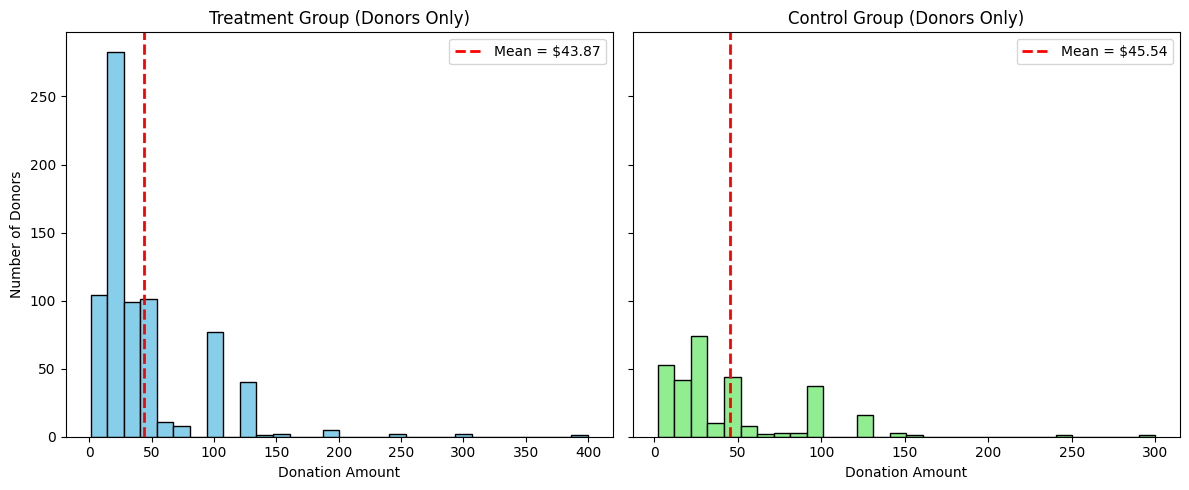

In [29]:
import matplotlib.pyplot as plt

# Subset to only donors (amount > 0)
donors_df = df[df['amount'] > 0]

# Separate treatment and control donor groups
donors_treat = donors_df[donors_df['treatment'] == 1]['amount']
donors_ctrl = donors_df[donors_df['treatment'] == 0]['amount']

# Calculate sample means
mean_treat = donors_treat.mean()
mean_ctrl = donors_ctrl.mean()

# Plot histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Treatment group plot
axes[0].hist(donors_treat, bins=30, color='skyblue', edgecolor='black')
axes[0].axvline(mean_treat, color='red', linestyle='dashed', linewidth=2)
axes[0].set_title('Treatment Group (Donors Only)')
axes[0].set_xlabel('Donation Amount')
axes[0].set_ylabel('Number of Donors')
axes[0].legend([f'Mean = ${mean_treat:.2f}'], loc='upper right')

# Control group plot
axes[1].hist(donors_ctrl, bins=30, color='lightgreen', edgecolor='black')
axes[1].axvline(mean_ctrl, color='red', linestyle='dashed', linewidth=2)
axes[1].set_title('Control Group (Donors Only)')
axes[1].set_xlabel('Donation Amount')
axes[1].legend([f'Mean = ${mean_ctrl:.2f}'], loc='upper right')

plt.tight_layout()
plt.show()


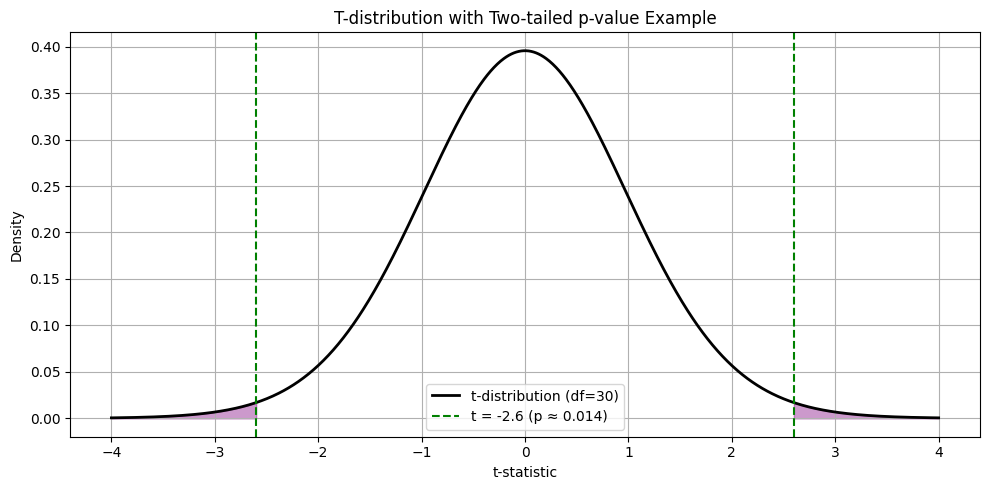

In [30]:
import scipy.stats as stats

# Set up values
x = np.linspace(-4, 4, 1000)
t_dist = stats.t(df=30)  # example df = 30
t_stat_example = -2.6
p_value = 2 * t_dist.cdf(t_stat_example)  # two-tailed p-value for t = -2.6

# Plot the t-distribution
plt.figure(figsize=(10, 5))
plt.plot(x, t_dist.pdf(x), color='black', linewidth=2, label='t-distribution (df=30)')

# Shade the two tails
x_tail_left = np.linspace(-4, t_stat_example, 300)
x_tail_right = np.linspace(-t_stat_example, 4, 300)
plt.fill_between(x_tail_left, t_dist.pdf(x_tail_left), color='purple', alpha=0.4)
plt.fill_between(x_tail_right, t_dist.pdf(x_tail_right), color='purple', alpha=0.4)

# Vertical line for t-stat
plt.axvline(x=t_stat_example, color='green', linestyle='--', label=f't = {t_stat_example} (p ≈ {p_value:.3f})')
plt.axvline(x=-t_stat_example, color='green', linestyle='--')

# Labels and styling
plt.title('T-distribution with Two-tailed p-value Example')
plt.xlabel('t-statistic')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
